In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [2]:
# Step 1: Data Preparation
data = pd.read_csv('goog1.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [3]:
# Step 2: Dataset Splitting
train_data = scaled_data[:int(len(scaled_data) * 0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8):]

In [4]:
# Step 3: Data Sequencing
def create_sequences(data, time_steps=6):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

In [5]:
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=4)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.1897
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.0310
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 0.0179
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.0274
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.0259
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0266
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 0.0264
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 526ms/step - loss: 0.0205
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - loss: 0.0247
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - loss: 0.0238
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0148
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.0263
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0218
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.0231
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0203


In [7]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


In [8]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  11.552777908482133
MSE:  137.50448447878847
RMSE:  11.726230616817515


In [9]:
# Step 6: Prediction
last_6_days = data['Close'][-6:].values
last_6_days_scaled = scaler.transform(last_6_days.reshape(-1, 1))
X_pred = []
X_pred.append(last_6_days_scaled)
X_pred = np.array(X_pred)
X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))

In [10]:
pred_price = model.predict(X_pred)
pred_price = scaler.inverse_transform(pred_price)
print('Predicted price for the next day: ', pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Predicted price for the next day:  [[838.4016]]


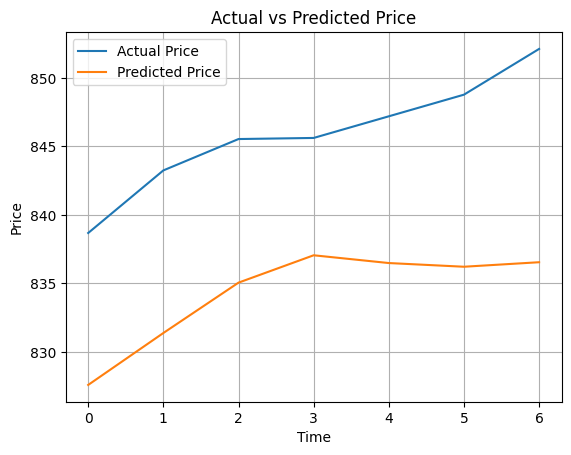

In [11]:
import matplotlib.pyplot as plt

# Plotting the original test data
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()